In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
ex = pd.read_csv('/content/drive/MyDrive/Data_for_study.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#그래프 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 도수분포표 
: 수집된 데이터를 분류한 후, 각 분류에 해당하는 데이터의 빈도, 비율 등으로 정리한 표를 말한다. (빈도표, 범주형 데이터)
1. 자료의 갯수를 센다.
2. 자료 내에서 최대/최소값을 찾는다.
3. 몇 개 구간(급의 수)으로 나눌지 결정한다.
    - 자료의 개수나 분포에 따라 달라져야 한다.
    - 각 구간에 5개 이상의 숫자가 들어가도록 하는 것이 좋다.
    - 너무 많은 구간을 나누지 않도록 한다.
4. 구간의 폭(급의 폭)을 구한다
    - 구간폭 : (최대값 - 최소값)/구간수
5. 구간의 경계값 (급의 경계값)을 구한다.
6. 구간별 자료의 갯수(도수)를 적는다.




In [6]:
ex

,Unnamed: 0,성별,연령,키,몸무게,학업성적,경제상태,건강인지,운동일수,스트레스인지,피로회복정도,음주경험,흡연경험,주중_인터넷이용시간,주말_인터넷이용시간
0,0,2.0,13.0,154.0,50.0,2.0,2.0,1.0,4.0,3.0,4.0,1.0,1.0,120.0,180.0
1,1,2.0,12.0,161.0,47.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,120.0,60.0
2,2,2.0,13.0,161.0,44.3,2.0,2.0,2.0,5.0,2.0,3.0,1.0,1.0,120.0,180.0
3,3,2.0,13.0,163.7,52.0,1.0,2.0,1.0,8.0,2.0,3.0,2.0,1.0,0.0,0.0
4,4,2.0,13.0,156.0,44.0,3.0,2.0,1.0,8.0,3.0,2.0,1.0,1.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55743,55743,1.0,18.0,170.1,73.0,4.0,5.0,2.0,4.0,2.0,3.0,1.0,1.0,0.0,0.0
55744,55744,1.0,18.0,171.0,75.0,2.0,2.0,1.0,4.0,3.0,1.0,1.0,1.0,70.0,200.0
55745,55745,2.0,18.0,159.0,50.0,2.0,4.0,4.0,1.0,2.0,5.0,2.0,1.0,0.0,0.0
55746,55746,2.0,18.0,153.7,63.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,130.0,80.0


##질적 변수 도수분포표 만들기
- 질적 자료 : 속성(범주)을 나타낸 자료로 범주형 자료라고도 불린다.
- 명목형 자료 : 순서에 의미가 없는 자료  
ex) 성별, 혈액형, 생사 여부 등
- 순서형 자료 : 순서에 의미가 있는 자료  
ex) 순위, 학점, 비만도 등
- 막대그래프, 원그래프

In [7]:
# 성별 도수분포표
#1 : 남자, 2 : 여자
ex.성별.value_counts()

1.0    29059
2.0    26689
Name: 성별, dtype: int64

In [9]:
sex_freq_table = pd.DataFrame(ex.성별.value_counts())
sex_freq_table.columns = ['freq']
sex_freq_table['ratio'] = np.round(sex_freq_table.freq/sum(sex_freq_table.freq),2)
sex_freq_table

,freq,ratio
1.0,29059,0.52
2.0,26689,0.48


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


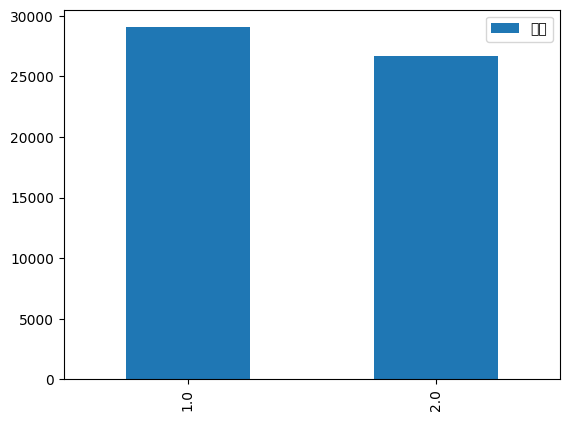

In [14]:
sex = pd.DataFrame(ex.성별.value_counts())
sex.plot.bar()

##양적 변수 도수분포표 만들기
- 양적 자료 : 수치로 나태날 수 있는 자료
- 연속형 자료 : 관측값들을 셀 수 없고 연속적인 구간의 값을 갖는 자료  
ex) 신장, 체중 등
- 이산형 자료 : 관측값들을 셀 수 있는 자료  
ex) 운동일수 등
- 히스토그램

In [23]:
# hist()함수의 bins 파라미터 : 히스토그램의 가로축 구간의 개수 지정
# 최소값, 최대값 구하기
print(ex.키.min())
print(ex.키.max())

136.0
196.0


In [27]:
print(type(ex.키))

<class 'pandas.core.series.Series'>


In [32]:
# 최소값 : 136, 최대값 : 196
# 구간 135 - 145, 145 - 155 , 155 - 165, 165 - 175, 175 - 185, 185 - 195, 195 - 205
bins = np.arange(135,200,10)
#pd.cut() 함수로 구간 나눈 후 빈도수 계산
tall = pd.cut(ex.키, bins = bins).value_counts()
#시리즈 -> 데이터프레임 변환
tall = pd.DataFrame({'Freq':tall.values},index=tall.index)
tall.index.name = 'Tall range'
tall

,Freq
Tall range,
"(155, 165]",22803
"(165, 175]",18741
"(175, 185]",7239
"(145, 155]",6258
"(185, 195]",446
"(135, 145]",260


##도수분포표 시각화 (히스토그램)
###파라미터
- x : 데이터값으로 리스트나 ndarray타입으로 넣음
- bins : 막대(bins)의 갯수
- range : bin의 범위
- density : Normalize를 함
- weights : x에 있는 모든 값의 가중치(y값의미), x와 모양이 같아야 한다.
- cumulative : True면 누적그래프로 그림
- histtype : 막대그래프타입(bar, barstacked, step, stepfilled)
- align : 각 막대 중앙의 위치(left, mid, right)
- orientation : 막대의 방향(vertical, horisontal), 기본값은 vertical (horizontal으로 하면 가로타입 막대그래프로 그려짐)
- rwith : 막대의 너비
- log : True면 히스토그램의 축이 로그 스케일(log scale)로 결정
- color : 막대의 색 결정
- edgecolor : 막대 선 색 결정
- label : 각 데이터에 대한 라벨을 붙임. 문자열이고 2개이상일 때는 리스트로 넣어야 함
- stacked : True일 때 다수의 데이터를 겹쳐서 표현할 수 있다.

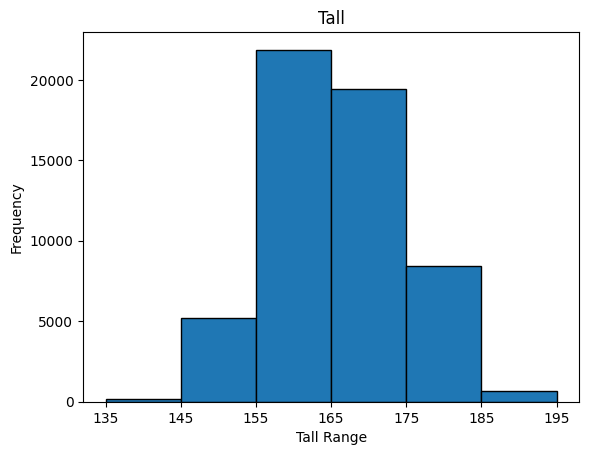

In [36]:
plt.hist(ex.키, bins = bins,edgecolor='black')
plt.xticks(bins)
plt.xlabel('Tall Range')
plt.ylabel('Frequency')
plt.title('Tall')
plt.show()

- 누적 히스토그램

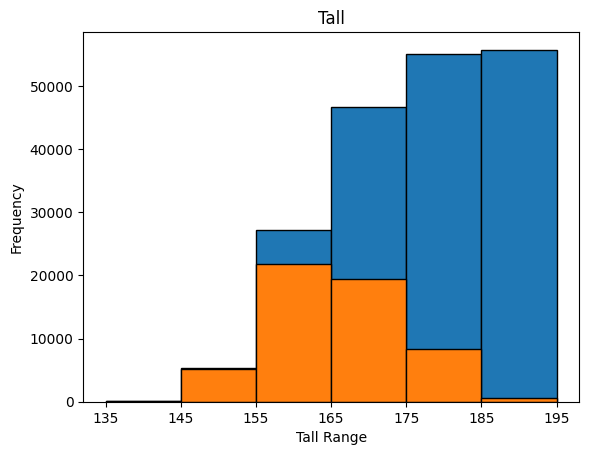

In [39]:
plt.hist(ex.키, bins = bins,edgecolor='black', cumulative = True)
plt.hist(ex.키, bins = bins,edgecolor='black', cumulative = False)
plt.xticks(bins)
plt.xlabel('Tall Range')
plt.ylabel('Frequency')
plt.title('Tall')
plt.show()